<a href="https://colab.research.google.com/github/rubyvanrooyen/ARIWS-Cookbook/blob/main/0-Introduction/2D_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2D Fourier Transforms

In [1]:
import numpy as np
import matplotlib.pylab as plt

Set up our convenience functions - now for the 2D case:

In [2]:
def ft2(y):
    """Returns the fourier transform of y"""
    return np.fft.fftshift(np.fft.fft2(np.fft.fftshift(y)))

def ftfreqs(N,dt):
    """Returns the Fourier frequencies"""
    return np.fft.fftshift(np.fft.fftfreq(N,dt))

Lets make a numpy array to use as our 2D function. We'll start with a 2D array of zeros, of size 100x100:

In [3]:
N1 = 100
g1 = np.zeros([N1,N1])

Now add a point source of amplitude 1 as the centre (the central pixel is at 100/2, 100/2), and Fourier transform it:

In [4]:
g1[N1//2,N1//2] = 1.0

G1 = ft2(g1)

Now plot it:

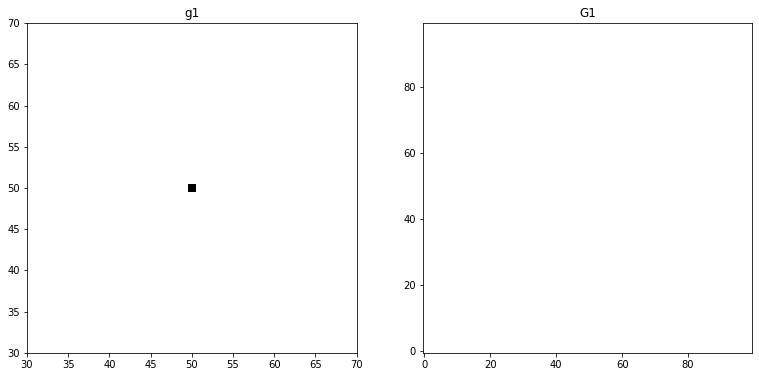

In [5]:
# plot g1 and G1
f, ax = plt.subplots(1,2,figsize=[13,8])  

ax[0].imshow(g1,cmap=plt.get_cmap('Greys'),origin='lower')
ax[0].set_xlim(N1/2-20,N1/2+20)
ax[0].set_ylim(N1/2-20,N1/2+20)
ax[0].set_title('g1')

ax[1].imshow(abs(G1),cmap=plt.get_cmap('Greys'),origin='lower')
ax[1].set_title('G1')
plt.show()

On the left we have our single point of amplitude 1.0, in the centre of the array. On the right we have...? What is going on on the right?

Lets print the Fourier Transform G to see what is going on:

In [6]:
print('Fourier transform G1: ')
print(G1)

Fourier transform G1: 
[[1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 ...
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]]


So the Fourier Transform G1 is just a constant amplitude of 1.0. That is what we would expect from the 1D case of a single spike of amplitude 1.0, which is a constant of amplitude 1.0. Our constant plane of amplitude 1.0 is just plotted by imshow as a white plane, when we use this colormap.

Now lets try the two dimensional version of the cosine Fourier transform - two spikes equidistant from the centre:

In [7]:
g2 = np.zeros([N1,N1])
g2[N1//2-10,N1//2-10] = 1.0
g2[N1//2+10,N1//2+10] = 1.0

G2 = ft2(g2)

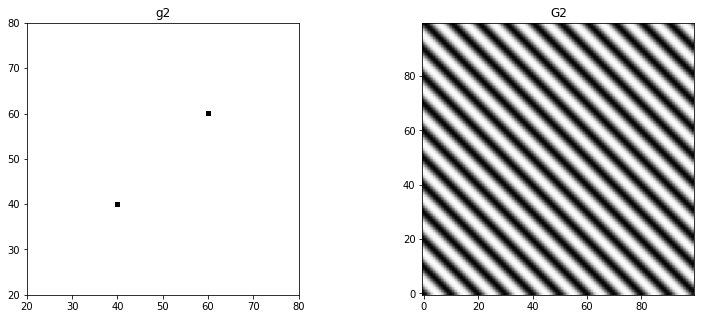

In [8]:
# plot g2 and G2
f, ax = plt.subplots(1,2,figsize=[13,5])  

ax[0].imshow(g2,cmap=plt.get_cmap('Greys'),origin='lower')
ax[0].set_xlim(N1/2-30,N1/2+30)
ax[0].set_ylim(N1/2-30,N1/2+30)
ax[0].set_title('g2')

ax[1].imshow(G2.real,cmap=plt.get_cmap('Greys'),origin='lower')
ax[1].set_title('G2')
plt.show()

As expected, the Fourier transform of our two spikes is a 2D cosine ripple. The ripple is perpendicular to the line between the two points. 

You can imaging this as a 1D case, with a 1D axis running between the two points. The 2D cosine ripple we see above would be projected onto our 1D-plane as a cosine function.

Lets try changing the orientation of our two spikes:

In [9]:
g3 = np.zeros([N1,N1])
g3[N1//2-10,N1//2+10] = 1.0
g3[N1//2+10,N1//2-10] = 1.0

G3 = ft2(g3)

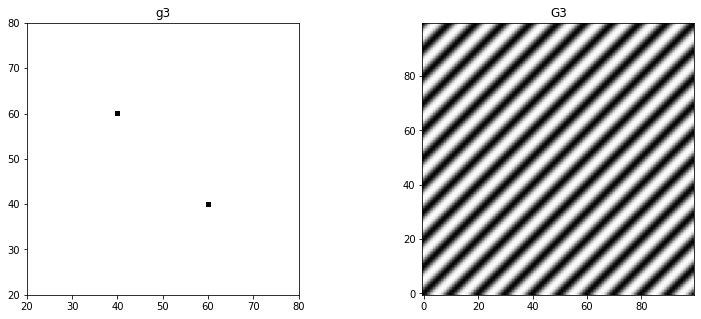

In [10]:
f, ax = plt.subplots(1,2,figsize=[13,5])  

ax[0].imshow(g3,cmap=plt.get_cmap('Greys'),origin='lower')
ax[0].set_xlim(N1/2-30,N1/2+30)
ax[0].set_ylim(N1/2-30,N1/2+30)
ax[0].set_title('g3')

ax[1].imshow(G3.real,cmap=plt.get_cmap('Greys'),origin='lower')
ax[1].set_title('G3')
plt.show()

Now lets try a sine. Remember that the Fourier transform of a sine is two spikes equidistant from the origin, but odd and imaginary:

In [11]:
g4 = np.zeros([N1,N1],dtype=np.complex)
g4[N1//2-10,N1//2+10] = 1.0j
g4[N1//2+10,N1//2-10] = -1.0j

G4 = ft2(g4)

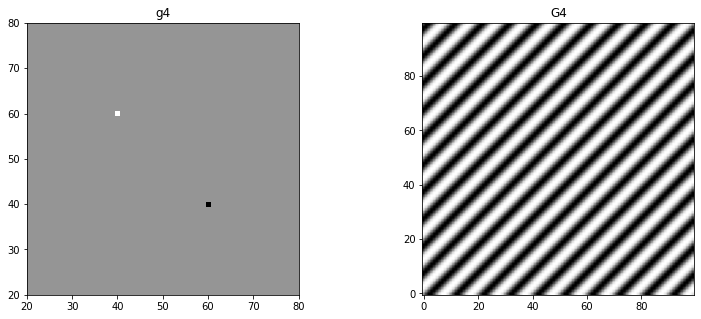

In [12]:
f, ax = plt.subplots(1,2,figsize=[13,5])  

ax[0].imshow(g4.imag,cmap=plt.get_cmap('Greys'),origin='lower')
ax[0].set_xlim(N1/2-30,N1/2+30)
ax[0].set_ylim(N1/2-30,N1/2+30)
ax[0].set_title('g4')

ax[1].imshow(G4.real,cmap=plt.get_cmap('Greys'),origin='lower')
ax[1].set_title('G4')
plt.show()

Lets plot the cosine and sine together to visually compare:
<br/>
(Note that for g4 we are plotting the imaginary component!)

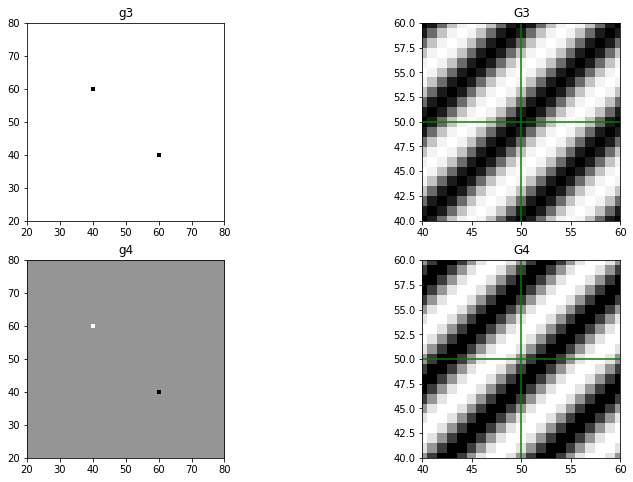

In [13]:
f, ax = plt.subplots(2,2,figsize=[13,8])  

ax[0,0].imshow(g3.real,cmap=plt.get_cmap('Greys'),origin='lower')
ax[0,0].set_xlim(N1/2-30,N1/2+30)
ax[0,0].set_ylim(N1/2-30,N1/2+30)
ax[0,0].set_title('g3')

ax[0,1].imshow(G3.real,cmap=plt.get_cmap('Greys'),origin='lower')
ax[0,1].set_xlim(N1/2-10,N1/2+10)
ax[0,1].set_ylim(N1/2-10,N1/2+10)
ax[0,1].set_title('G3')
ax[0,1].axhline(y=N1/2,color='g')
ax[0,1].axvline(x=N1/2,color='g')

ax[1,0].imshow(g4.imag,cmap=plt.get_cmap('Greys'),origin='lower')
ax[1,0].set_xlim(N1/2-30,N1/2+30)
ax[1,0].set_ylim(N1/2-30,N1/2+30)
ax[1,0].set_title('g4')

ax[1,1].imshow(G4.real,cmap=plt.get_cmap('Greys'),origin='lower')
ax[1,1].set_xlim(N1/2-10,N1/2+10)
ax[1,1].set_ylim(N1/2-10,N1/2+10)
ax[1,1].set_title('G4')
ax[1,1].axhline(y=N1/2,color='g')
ax[1,1].axvline(x=N1/2,color='g')
plt.show()

Notice the pi/2 shift between G3 and G4 - you can see it if you look at the centre of the green cross-hairs.
This is because G3 is a cosine, G4 is a sine.

Now lets try taking the Fourier transform of a disk. Lets use a larger array:

In [14]:
N2 = 1200
g5 = np.zeros([N2,N2])

# this just sets g5 to 1.0 within a radius if N2/2 from the centre:
xvals = np.tile(np.arange(0,N2,1),(N2,1))
yvals = np.transpose(np.tile(np.arange(N2,0,-1),(N2,1)))
g5[((xvals-N2//2)**2.0+(yvals-N2//2)**2.0)<500] = 1.0

G5 = ft2(g5)

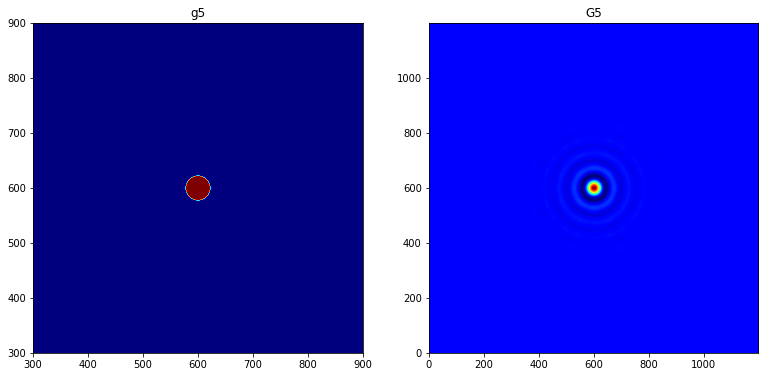

In [15]:
# crease plot to change along the way
f, ax = plt.subplots(1,2,figsize=[13,8])  

ax[0].imshow(g5,cmap=plt.get_cmap('jet'),origin='lower')
ax[0].set_xlim(N2/2-300,N2/2+300)
ax[0].set_ylim(N2/2-300,N2/2+300)
ax[0].set_title('g5')

ax[1].imshow(G5.real,cmap=plt.get_cmap('jet'),origin='lower')
ax[1].set_title('G5')
plt.show()

The Fourier transform of the uniform disk on the left is called an Airy disk. The 1D analogue is the transform between a top hat (rectangle) function and the sinc function.

Lets add our two-spike function (Fourier transform of a cosine) to our disk, to demonstrate the Addition Theorem in 2D:

In [16]:
g6 = np.zeros([N2,N2])
g6[N2//2-10,N2//2+10] = 40.0
g6[N2//2+10,N2//2-10] = 40.0

G6 = ft2(g6)

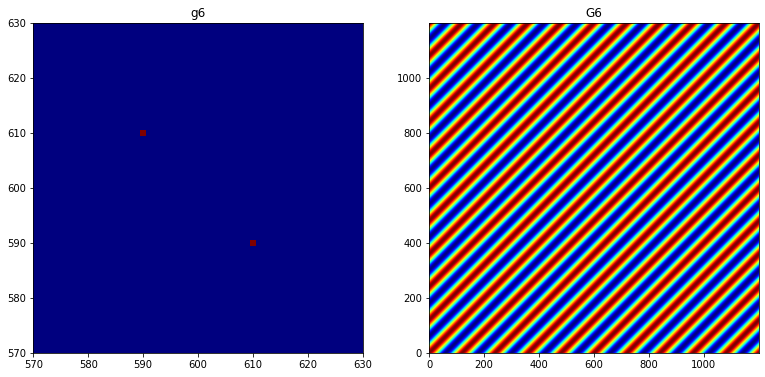

In [17]:
# crease plot to change along the way
f, ax = plt.subplots(1,2,figsize=[13,8])  

ax[0].imshow(g6,cmap=plt.get_cmap('jet'),origin='lower')
ax[0].set_xlim(N2/2-30,N2/2+30)
ax[0].set_ylim(N2/2-30,N2/2+30)
ax[0].set_title('g6')

ax[1].imshow(G6.real,cmap=plt.get_cmap('jet'),origin='lower')
ax[1].set_title('G6')
plt.show()

Now add our disk function g5 to our two-spike function g6, and take the Fourier transform:

In [18]:
g7 = g5 + g6
G7 = ft2(g7)

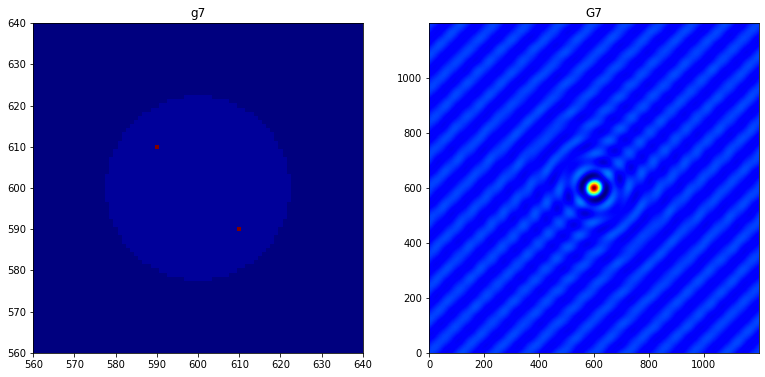

In [19]:
# crease plot to change along the way
f, ax = plt.subplots(1,2,figsize=[13,8])  

ax[0].imshow(g7,cmap=plt.get_cmap('jet'),origin='lower')
ax[0].set_xlim(N2/2-40,N2/2+40)
ax[0].set_ylim(N2/2-40,N2/2+40)
ax[0].set_title('g7')

ax[1].imshow(G7.real,cmap=plt.get_cmap('jet'),origin='lower')
ax[1].set_title('G7')
plt.show()